<a href="https://colab.research.google.com/github/ucfilho/Disciplina_Metodos_Numericos_2020/blob/master/Mod_03_class_04_ode_metodos_out_05_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
!git clone https://github.com/ucfilho/Disciplina_Metodos_Numericos_2020 #clonar do Github
%cd Disciplina_Metodos_Numericos_2020

fatal: destination path 'Disciplina_Metodos_Numericos_2020' already exists and is not an empty directory.
/content/Disciplina_Metodos_Numericos_2020


No handles with labels found to put in legend.


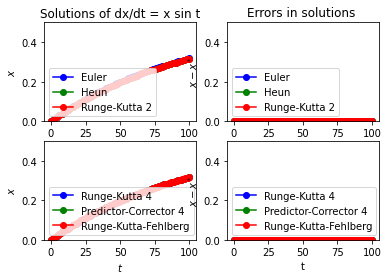

In [3]:
from edo_rotinas import euler, heun, rk2a,rk2b
from edo_rotinas import rk4, rk45, rkf, pc4

def f( x, t ):
  V=80 #m3
  Q2=0.8   # m3/min
  Q1=0.005 # m3/min
  dV_dt = Q1-Q2*x/V
  return dV_dt
      

a, b = ( 0.0, 100 )
x0 = 0.0

n = 51
t = np.linspace( a, b, n )
h = t[1] - t[0];
tol = 1e-6

# compute various numerical solutions
x_euler = euler( f, x0, t )
x_heun = heun( f, x0, t )
x_rk2 = rk2a( f, x0, t )
x_rk4 = rk4( f, x0, t )
x_pc4 = pc4( f, x0, t )
t_rkf, x_rkf = rkf( f, a, b, x0, tol, 1.0, 0.01 ) # unequally spaced t

# compute true solution values in equal spaced and unequally spaced cases
V=80 #m3
Q1=0.005 # m3/min
Q2=0.8 # m3/min
x = V*Q1/Q2*(1.0-np.exp(-Q2*t/V))
xrkf = V*Q1/Q2*(1.0-np.exp(-Q2*t_rkf/V))

plt.legend(fontsize=2) 
#   figure( 1 )
plt.subplot( 221 )
plt.plot( t, x_euler, 'b-o', t, x_heun, 'g-o', t, x_rk2, 'r-o' )
plt.ylim(0,0.5)
plt.xlabel( 't' )
plt.ylabel( '$x$' )
plt.title( 'Solutions of dx/dt = x sin t')
plt.legend( ( 'Euler ', 'Heun ', 'Runge-Kutta 2' ),
            loc='lower left' )

#   figure( 2 )
plt.subplot( 222 )
plt.plot( t, x_euler - x, 'b-o', t, x_heun - x, 'g-o', t, x_rk2 - x, 'r-o' )
plt.ylim(0,0.5)
plt.xlabel( 't' )
plt.ylabel( '$x - x^*$' )
plt.title( 'Errors in solutions ' )
plt.legend( ( 'Euler', 'Heun', 'Runge-Kutta 2' ),loc='lower left' )

#   figure( 3 )
plt.subplot( 223)
plt.plot( t, x_rk4, 'b-o', t, x_pc4, 'g-o', t_rkf, x_rkf, 'r-o' )
plt.ylim(0,0.5)
plt.xlabel( '$t$' )
plt.ylabel( '$x$' )
#title( 'Solutions of dx/dt = x sin t' )
plt.legend( ( 'Runge-Kutta 4', 'Predictor-Corrector 4', \
              'Runge-Kutta-Fehlberg' ), loc='lower left' )

#   figure( 4 )
plt.subplot( 224 )
plt.plot( t, x_rk4 - x, 'b-o', t, x_pc4 - x, 'g-o', t_rkf, x_rkf - xrkf, 'r-o' )
plt.ylim(0,0.5)
plt.xlabel( 't' )
plt.ylabel( '$x - x^*$' )
plt.legend( ( 'Runge-Kutta 4', 'Predictor-Corrector 4','Runge-Kutta-Fehlberg' ), loc='lower left' )

plt.show()

In [4]:
x_rkf

array([0.        , 0.00497508, 0.00990066, 0.01477723, 0.01960528,
       0.02438529, 0.02911773, 0.03380309, 0.03844183, 0.04303441,
       0.04758129, 0.05208293, 0.05653978, 0.06095228, 0.06532088,
       0.06964601, 0.07392811, 0.07816759, 0.08236489, 0.08652043,
       0.09063462, 0.09470788, 0.0987406 , 0.1027332 , 0.10668607,
       0.11059961, 0.11447421, 0.11831025, 0.12210813, 0.12586822,
       0.12959089, 0.13327652, 0.13692548, 0.14053813, 0.14411484,
       0.14765596, 0.15116184, 0.15463283, 0.1580693 , 0.16147156,
       0.16483998, 0.16817487, 0.17147659, 0.17474545, 0.17798179,
       0.18118592, 0.18435818, 0.18749887, 0.1906083 , 0.1936868 ,
       0.19673467, 0.19975221, 0.20273973, 0.20569752, 0.20862587,
       0.21152509, 0.21439547, 0.21723728, 0.22005082, 0.22283636,
       0.22559418, 0.22832457, 0.23102778, 0.2337041 , 0.23635379,
       0.23897711, 0.24157433, 0.24414571, 0.2466915 , 0.24921197,
       0.25170735, 0.2541779 , 0.25662387, 0.2590455 , 0.26144